## Importing all necessary libraries and modules

In [6]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

ModuleNotFoundError: No module named 'wordcloud'

## Reading the original dataset file

In [2]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


## Droping Rows from the DataFrame where the value in the specified column is null. 
## Drops the first column whihc is not necesaary from the DataFrame and update the dataframe

In [3]:
for column in ["Division Name","Department Name","Class Name","Review Text"]:
    df = df[df[column].notnull()]
df.drop(df.columns[0], inplace=True, axis=1)
df.head(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [4]:
df.head(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [5]:
df.shape

(22628, 10)

## Adding a new Column named Label. Assigning Label=1 for all columns 

In [6]:
df['Label'] = 0


In [7]:
df.loc[df.Rating >= 3, ['Label']] = 1

## Adding a new column and storing the word count of 'Review Text' column

In [8]:
df['Word Count'] = df['Review Text'].str.split().apply(len)

In [9]:
df.head(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Label,Word Count
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,1,8
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,1,62
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,1,98
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,1,22
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,1,36
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0,98
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,1,101
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,1,97
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,1,34
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,1,72


In [10]:
df.sample(5)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Label,Word Count
5491,1111,38,Maternity tablecloth,I had high hopes for this dress but my husband...,1,0,0,General Petite,Dresses,Dresses,0,73
6033,873,27,Cute peplum top!,I tried this on in-store. it is super cute! i ...,5,1,0,General,Tops,Knits,1,37
2370,844,26,Too sheer,I bought both colors based on the reviews and ...,2,0,2,General,Tops,Blouses,0,98
231,1066,46,"Wonderful weight for summer, flattering",I tried these on on a whim because i liked the...,5,1,8,General,Bottoms,Pants,1,75
13466,921,54,Oversized and itchy,The small is huge on me and the sweater is ver...,3,0,0,General,Tops,Sweaters,1,22


## Operations on Numerical data present

In [11]:
df.describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
Clothing ID,919.695908,201.683804,1.0,861.0,936.0,1078.0,1205.0
Age,43.282880,12.328176,18.0,34.0,41.0,52.0,99.0
Rating,4.183092,1.115911,1.0,4.0,5.0,5.0,5.0
Recommended IND,0.818764,0.385222,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,2.631784,5.787520,0.0,0.0,1.0,3.0,122.0
Label,0.895263,0.306222,0.0,1.0,1.0,1.0,1.0
Word Count,60.211950,28.533053,2.0,36.0,59.0,88.0,115.0


In [12]:
df[['Title', 'Division Name', 'Department Name', 'Class Name']].describe(include=['O']).T.drop('count', axis=1)

,unique,top,freq
Title,13983,Love it!,136
Division Name,3,General,13365
Department Name,6,Tops,10048
Class Name,20,Dresses,6145


## Age and Positive Feedback Frequency Distributions

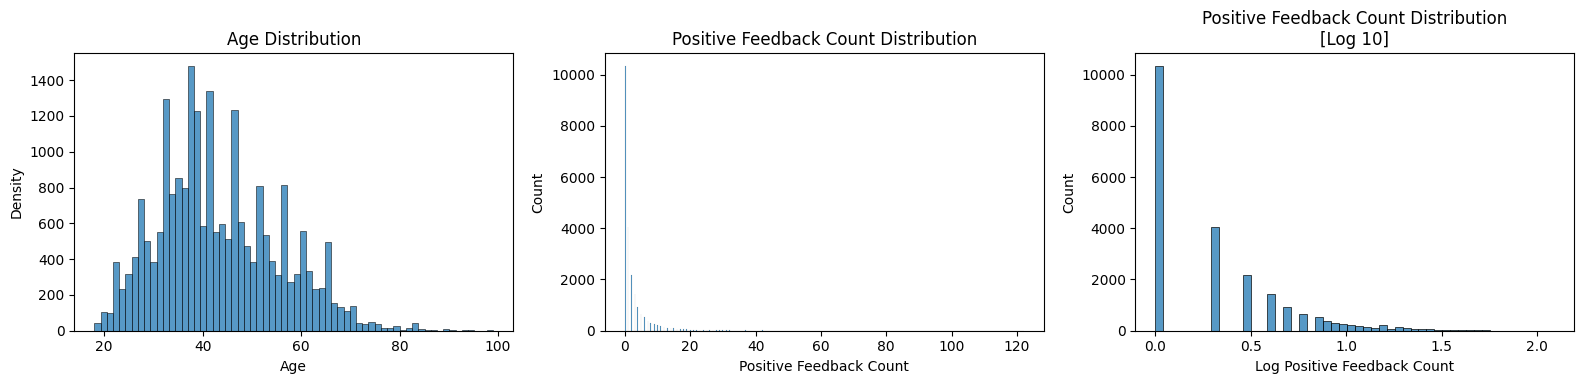

In [13]:
f, ax = plt.subplots(1, 3, figsize=(16, 4), sharey=False)
sns.histplot(df.Age, ax=ax[0])
ax[0].set_title('Age Distribution')
ax[0].set_ylabel('Density')
sns.histplot(df['Positive Feedback Count'], ax=ax[1])
ax[1].set_title('Positive Feedback Count Distribution')
sns.histplot(np.log10((df['Positive Feedback Count'][df['Positive Feedback Count'].notnull()] + 1)), ax=ax[2])
ax[2].set_title('Positive Feedback Count Distribution\n[Log 10]')
ax[2].set_xlabel('Log Positive Feedback Count')
plt.rcParams.update({'font.size': 12})
plt.tight_layout()
plt.savefig('age-and-positive-feedback-freqdist.png', format='png', dpi=600)
plt.show()

## Division Name and Department Name Distributions

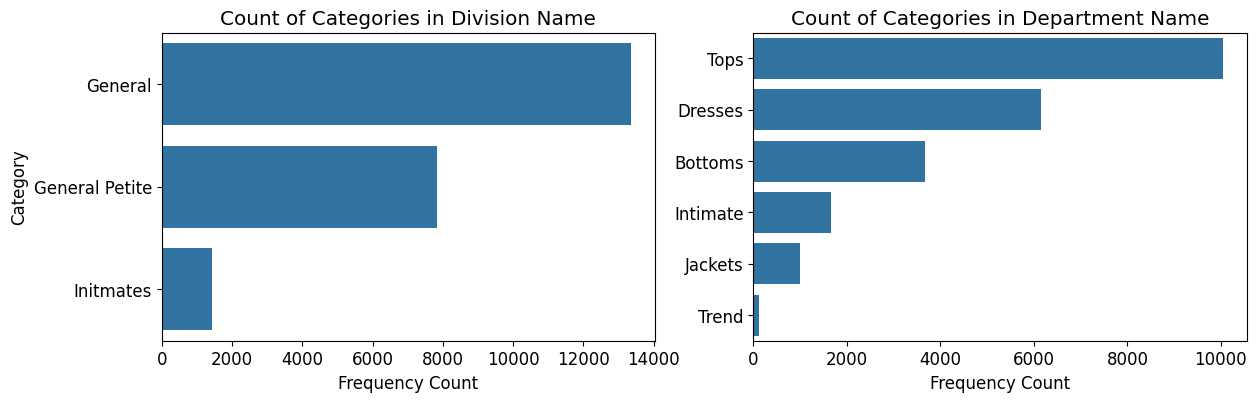

In [14]:
row_plots = ['Division Name', 'Department Name']
f, axes = plt.subplots(1, len(row_plots), figsize=(14, 4), sharex=False)

for i, x in enumerate(row_plots):
    sns.countplot(y=x, data=df, order=df[x].value_counts().index, ax=axes[i])
    axes[i].set_title('Count of Categories in {}'.format(x))
    axes[i].set_xlabel('')
    axes[i].set_xlabel('Frequency Count')
axes[0].set_ylabel('Category')
axes[1].set_ylabel('')
plt.savefig('divname-and-deptname-freqdist.png', format='png', dpi=600)
plt.show()

## Clothing ID Frequency Distribution

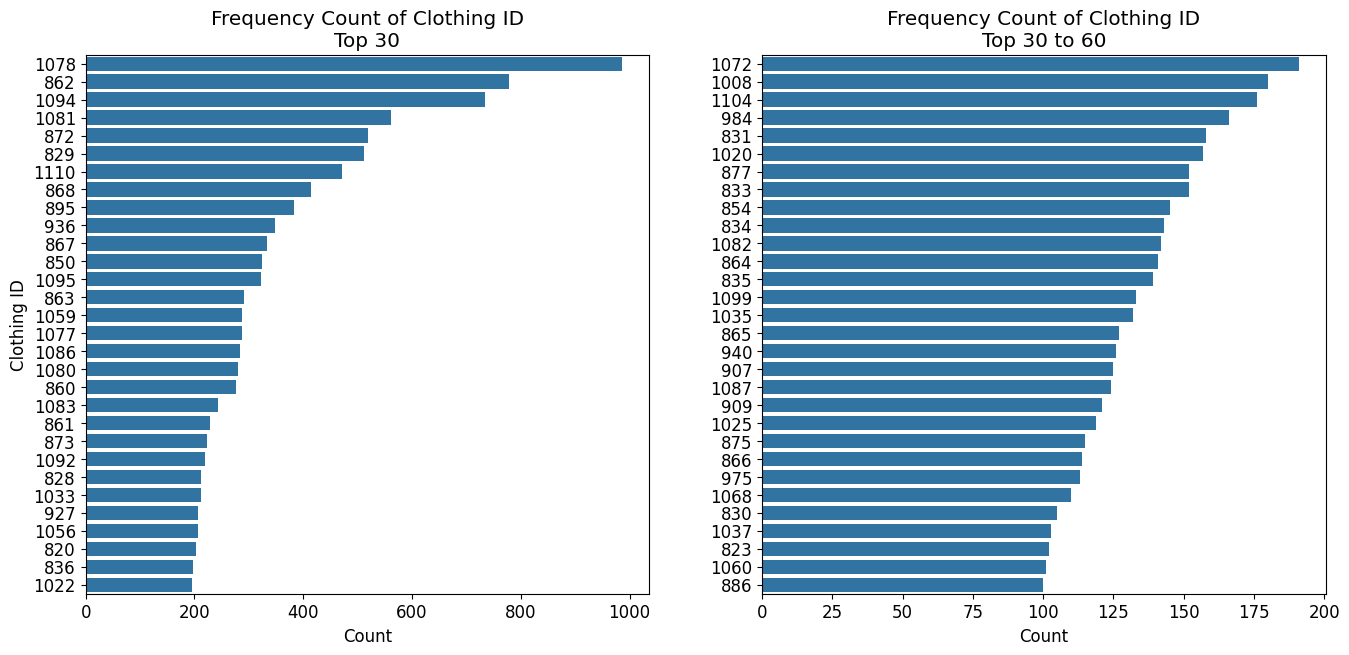

Dataframe Dimension: 22628 Rows


,mean,std,min,25%,50%,75%,max
Clothing ID,1015.4848,103.396022,862.0,862.0,1078.0,1094.0,1094.0
Age,42.7248,12.150429,18.0,34.0,41.0,51.0,99.0
Rating,4.1892,1.104306,1.0,4.0,5.0,5.0,5.0
Recommended IND,0.8184,0.385592,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,2.8624,6.773021,0.0,0.0,1.0,3.0,98.0
Label,0.9024,0.296832,0.0,1.0,1.0,1.0,1.0
Word Count,60.5912,28.731486,2.0,36.0,60.0,89.0,115.0


In [15]:
# Clothing ID Category
f, axes = plt.subplots(1, 2, figsize=[16, 7])
num = 30
sns.countplot(y='Clothing ID', data=df[df['Clothing ID'].isin(df['Clothing ID'].value_counts()[:num].index)],
              order= df['Clothing ID'].value_counts()[:num].index, ax=axes[0])
axes[0].set_title('Frequency Count of Clothing ID\nTop 30')
axes[0].set_xlabel('Count')

sns.countplot(y='Clothing ID', data=df[df['Clothing ID'].isin(df['Clothing ID'].value_counts()[num:60].index)],
              order=df['Clothing ID'].value_counts()[num:60].index, ax=axes[1])
axes[1].set_title('Frequency Count of Clothing ID\nTop 30 to 60')
axes[1].set_ylabel('')
axes[1].set_xlabel('Count')
plt.savefig('freqdist-clothingid-top60.png', format='png', dpi=600)
plt.show()

print('Dataframe Dimension: {} Rows'.format(df.shape[0]))
df[df['Clothing ID'].isin([1078, 862,1094])].describe().T.drop('count',axis=1)

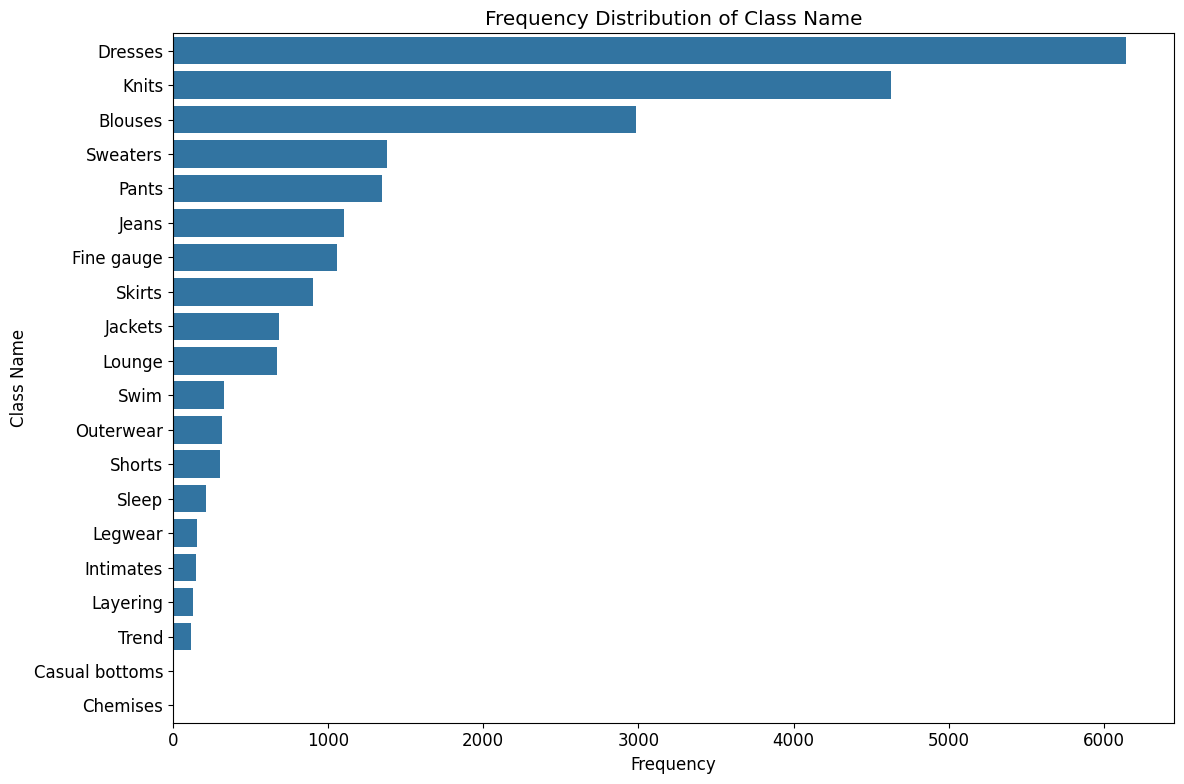

In [16]:
# Class Name
plt.subplots(figsize=(12, 8))
sns.countplot(y='Class Name', data=df,order=df['Class Name'].value_counts().index)
plt.title('Frequency Distribution of Class Name')
plt.xlabel('Frequency')
plt.tight_layout()
plt.savefig('freqdist-classname.png', format='png', dpi=300)
plt.show()

## Frequency Distribution of Rating, Recommended IND, and Label

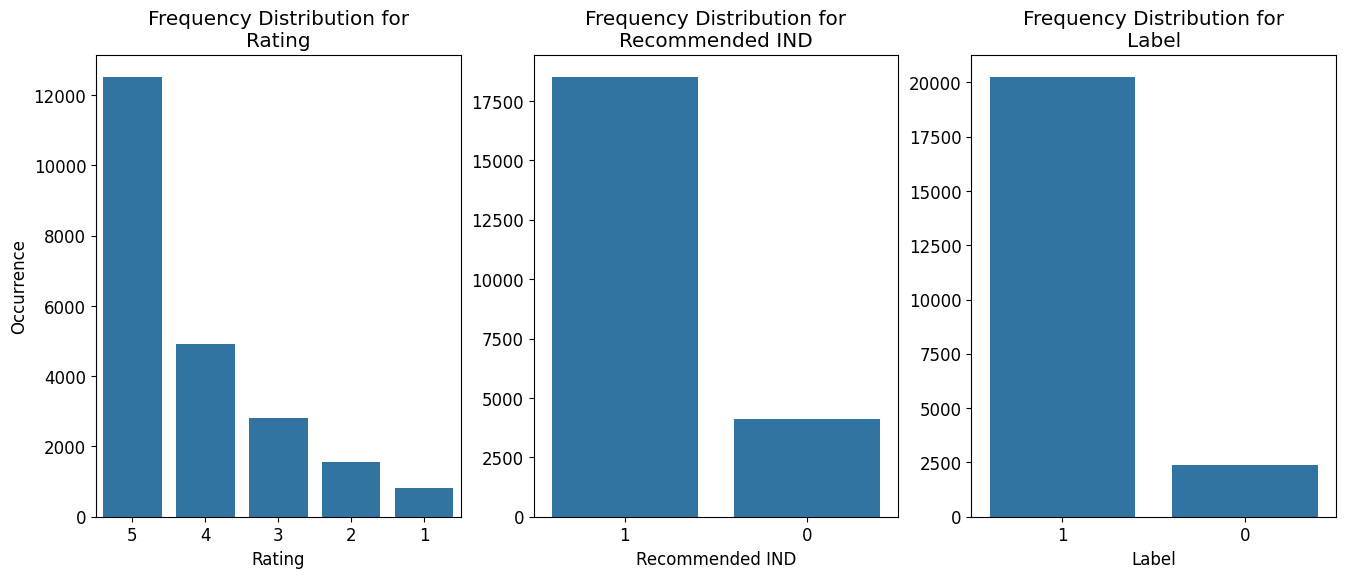

In [17]:
cat_dtypes = ['Rating', 'Recommended IND', 'Label']
increment = 0
f, axes = plt.subplots(1, len(cat_dtypes), figsize=(16, 6), sharex=False)

for i in range(len(cat_dtypes)):
    sns.countplot(x=cat_dtypes[increment], data=df, order=df[cat_dtypes[increment]].value_counts().index, ax=axes[i])
    axes[i].set_title('Frequency Distribution for\n{}'.format(cat_dtypes[increment]))
    axes[i].set_ylabel('Occurrence')
    axes[i].set_xlabel('{}'.format(cat_dtypes[increment]))
    increment += 1
axes[1].set_ylabel('')
axes[2].set_ylabel('')
plt.savefig('freqdist-rating-recommended-label.png', format='png', dpi=300)
plt.show()

## Word Count by Rating, Department Name, and Recommended IND

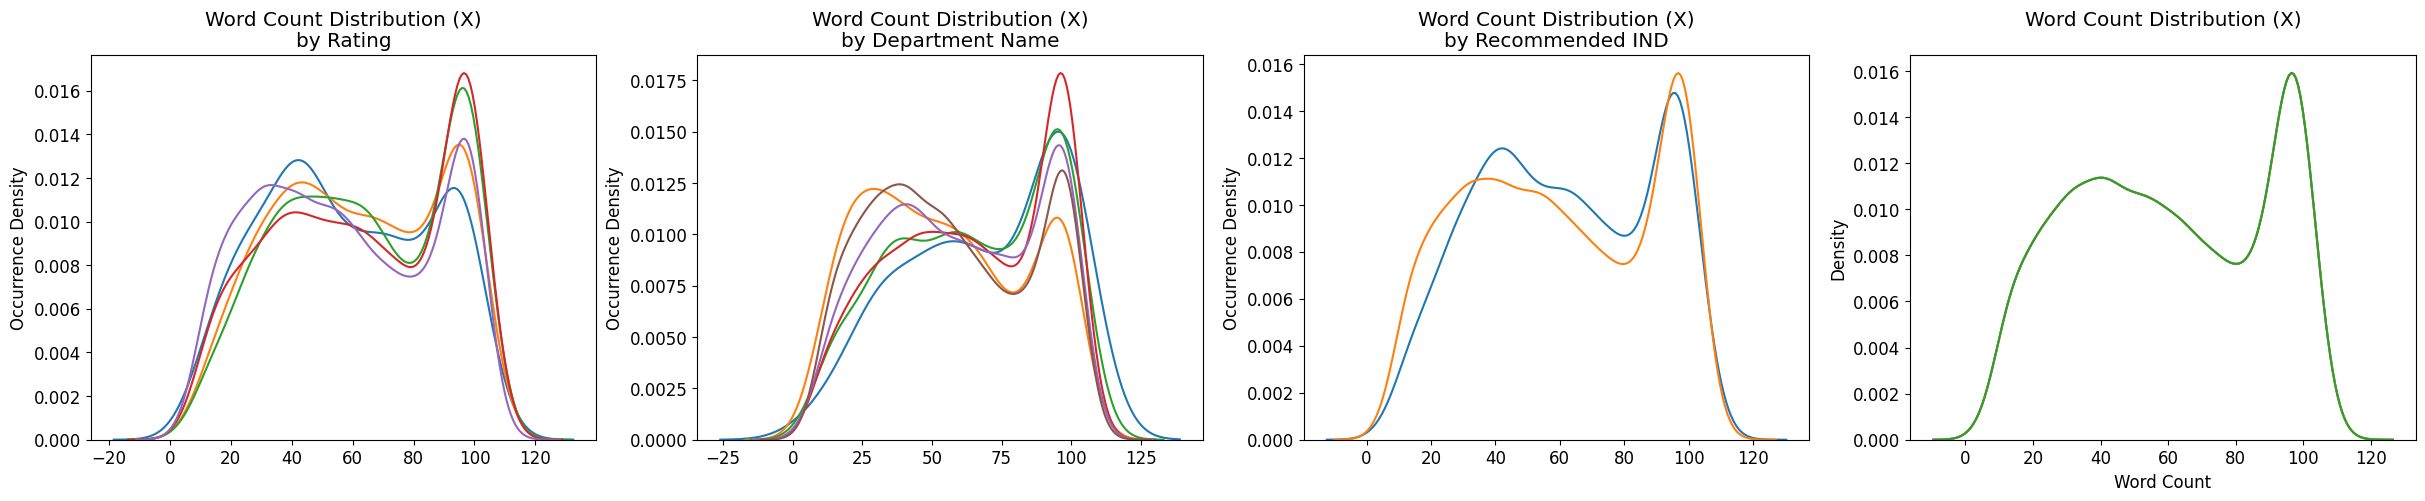


Total Word Count is: 1362476


count    22628.000000
mean        60.211950
std         28.533053
min          2.000000
25%         36.000000
50%         59.000000
75%         88.000000
max        115.000000
Name: Word Count, dtype: float64

In [18]:
f, axes = plt.subplots(1, 4, figsize=(30, 5), sharex=False)

for index, y in enumerate(['Rating', 'Department Name', 'Recommended IND']):
    for x in set(df[y][df[y].notnull()]):
        sns.kdeplot(df['Word Count'][df[y]==x], label=x, ax=axes[index])
        axes[index].set_title('{} Distribution (X)\nby {}'.format('Word Count', y))
    axes[index].set_ylabel('Occurrence Density')
    axes[index].set_xlabel('')
    
    # Plot 4
    axes[3].set_title('Word Count Distribution (X)\n')
    sns.kdeplot(df['Word Count'],ax=axes[3])
    axes[index].set_xlabel("")
    # axes[3].legend_.remove()
    axes[3].legend_=None
plt.savefig('wordcountdist-rating-deptname-recommended.png', format='png', dpi=300)
plt.show()

print("\nTotal Word Count is: {}".format(df["Word Count"].sum()))
df['Word Count'].describe().T

# Multivariate Distributions

## Categorical Variable by Categorical Variable

## Division Name by Department Name

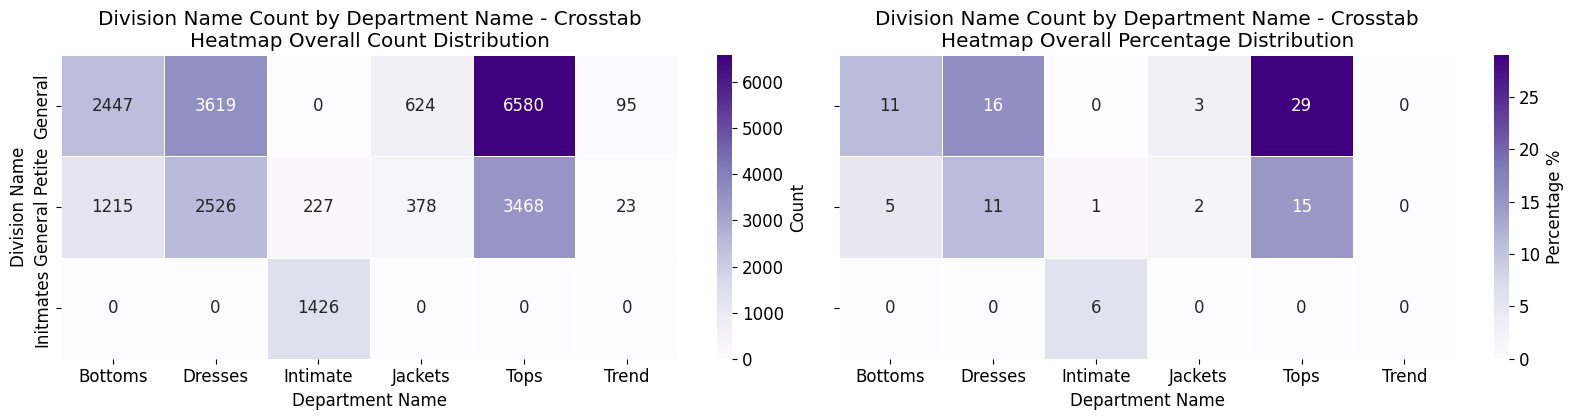

In [19]:
f, ax = plt.subplots(1, 2, figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(df['Division Name'], df['Department Name']),
            annot=True, linewidths=.5, ax=ax[0], fmt='g', cmap='Purples',
            cbar_kws={'label': 'Count'})
ax[0].set_title('Division Name Count by Department Name - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(df['Division Name'], df['Department Name'], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap='Purples',
            cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Division Name Count by Department Name - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.savefig('divname-deptname.png', format='png', dpi=300)
plt.show()

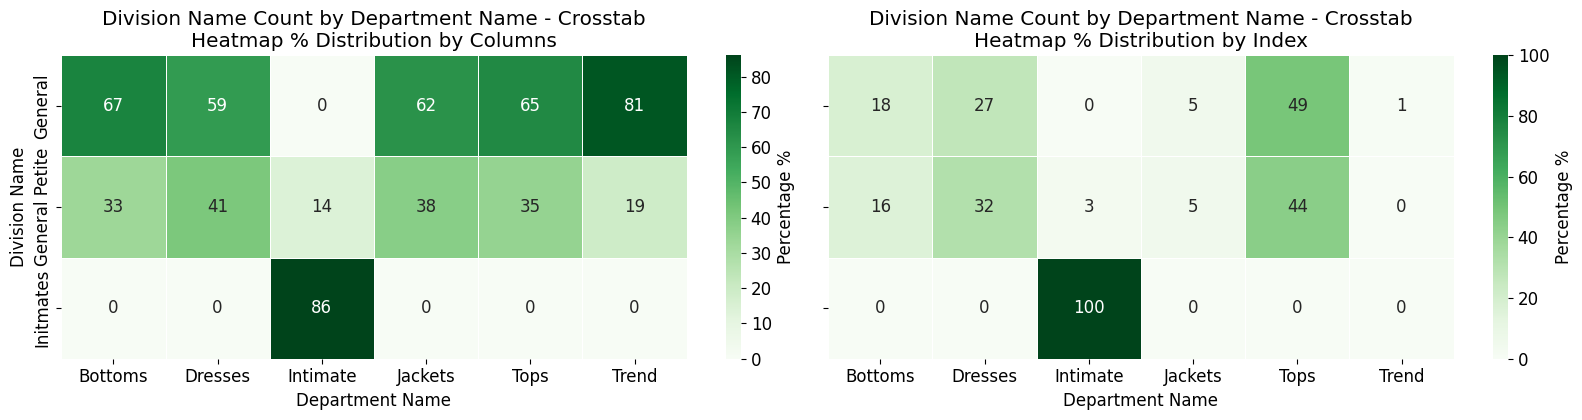

In [20]:
f, ax = plt.subplots(1, 2, figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(df['Division Name'], df['Department Name'], normalize='columns').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[0], fmt='g', cmap='Greens',
            cbar_kws={'label': 'Percentage %'})
ax[0].set_title('Division Name Count by Department Name - Crosstab\nHeatmap % Distribution by Columns')

sns.heatmap(pd.crosstab(df['Division Name'], df['Department Name'], normalize='index').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap='Greens',
            cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Division Name Count by Department Name - Crosstab\nHeatmap % Distribution by Index')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.savefig('divname-deptname-pivot.png', format='png', dpi=300)
plt.show()

## Class Name by Department Name

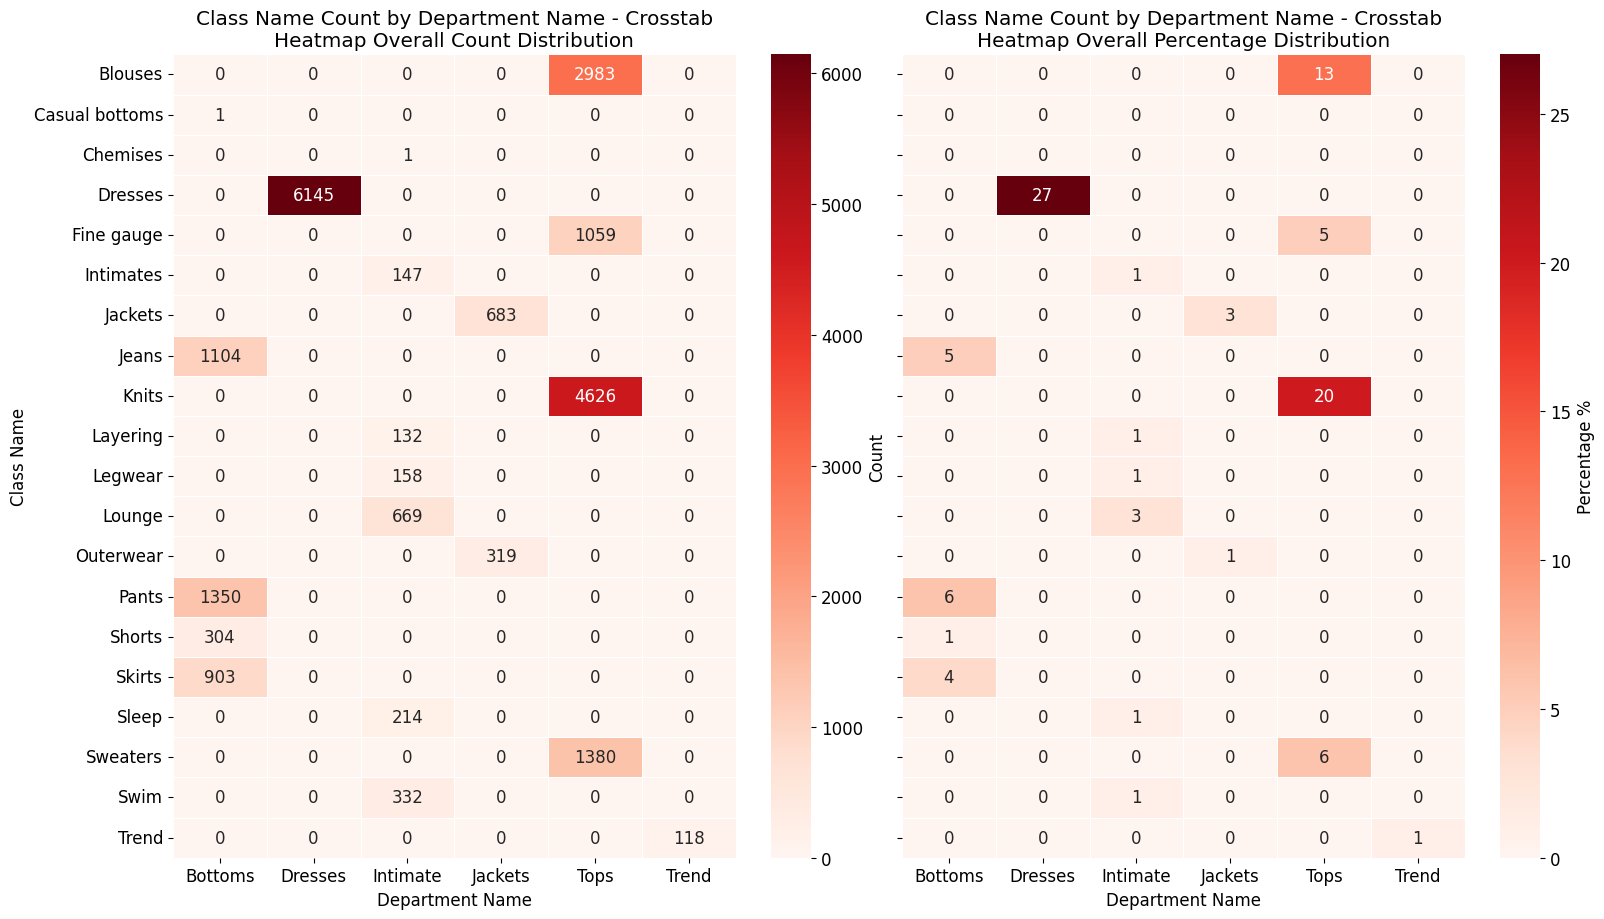

In [21]:
f, ax = plt.subplots(1, 2, figsize=(16, 9), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df['Department Name']),
            annot=True, linewidths=.5, ax=ax[0], fmt='g', cmap='Reds',
            cbar_kws={'label': 'Count'})
ax[0].set_title('Class Name Count by Department Name - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(df['Class Name'], df['Department Name'], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap='Reds',
            cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Department Name - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.savefig('classname-deptname.png', format='png', dpi=300)
plt.show()

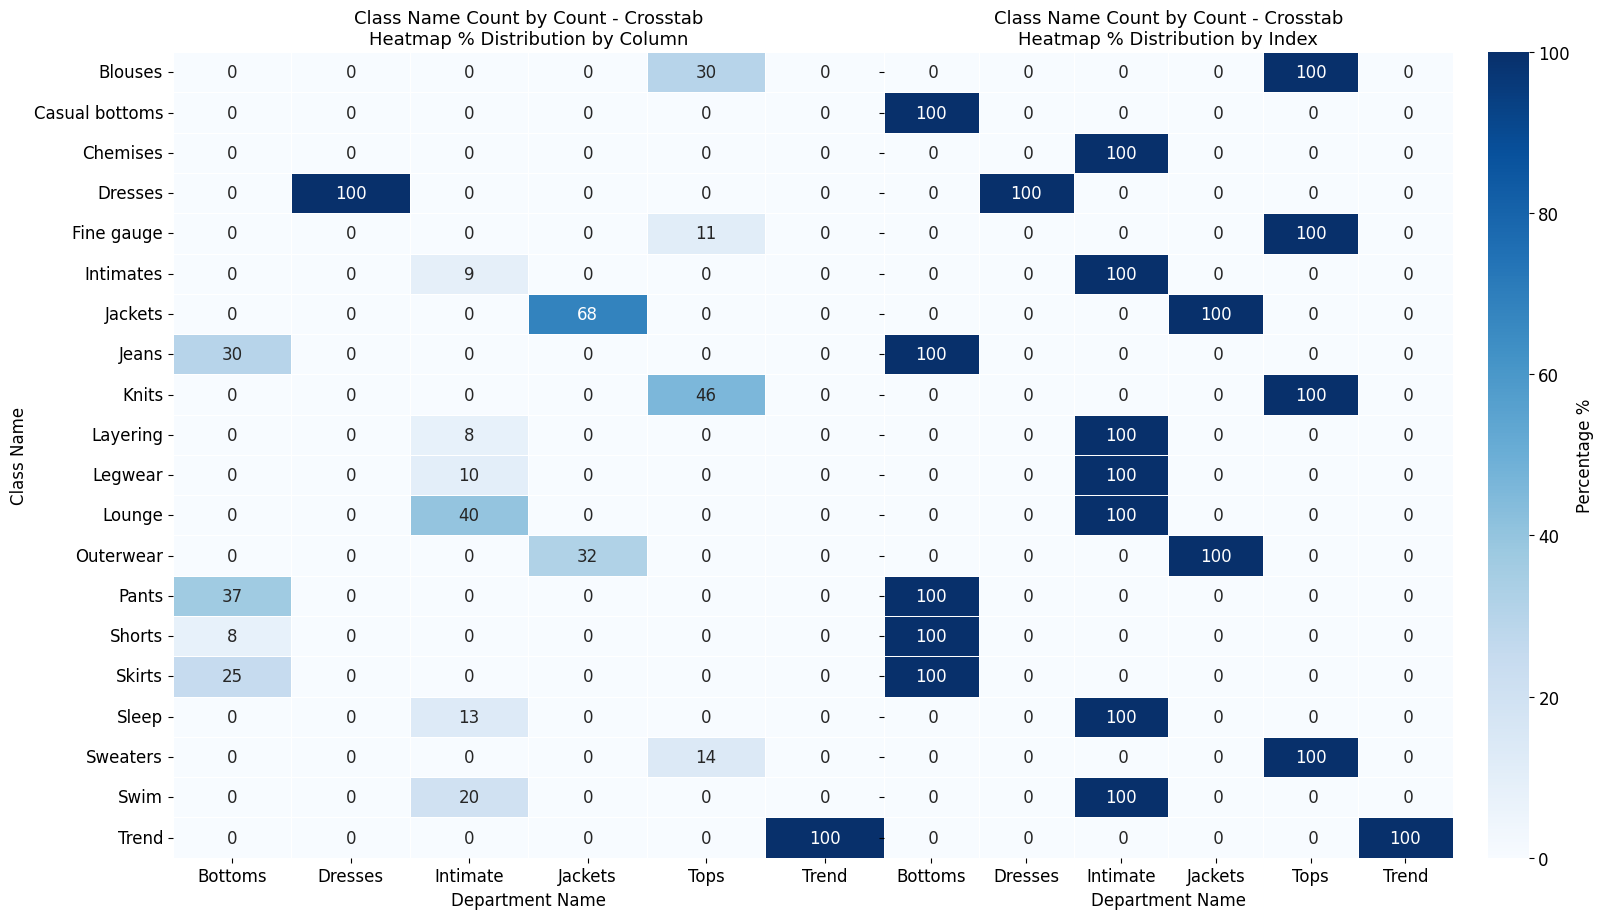

In [22]:
f, ax = plt.subplots(1, 2, figsize=(16, 9), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df['Department Name'], normalize = 'columns').mul(100).round(0),
            annot=True, fmt='g', linewidths=.5, ax=ax[0],cbar=False, cmap='Blues')
ax[0].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Column', fontsize=fsize)
ax[1] = sns.heatmap(pd.crosstab(df['Class Name'], df['Department Name'], normalize = 'index').mul(100).round(0),
                    annot=True, fmt='2g', linewidths=.5, ax=ax[1],cmap='Blues',
                    cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Index', fontsize=fsize)
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.savefig('classname-deptname-pivot.png', format='png', dpi=300)
plt.show()

## Division Name by Department Name

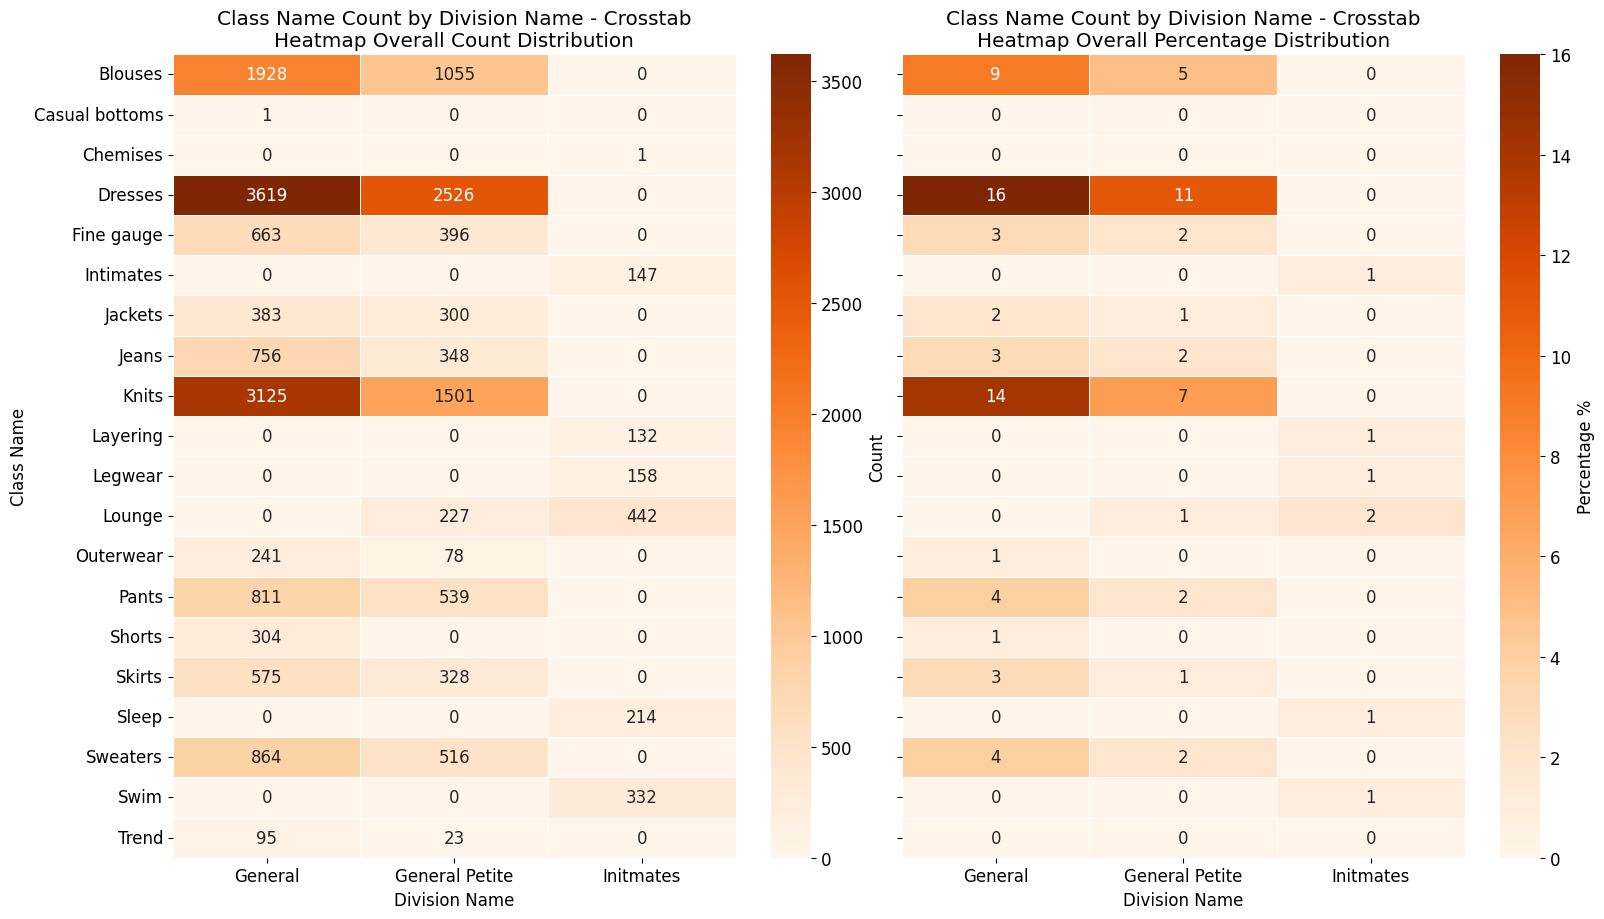

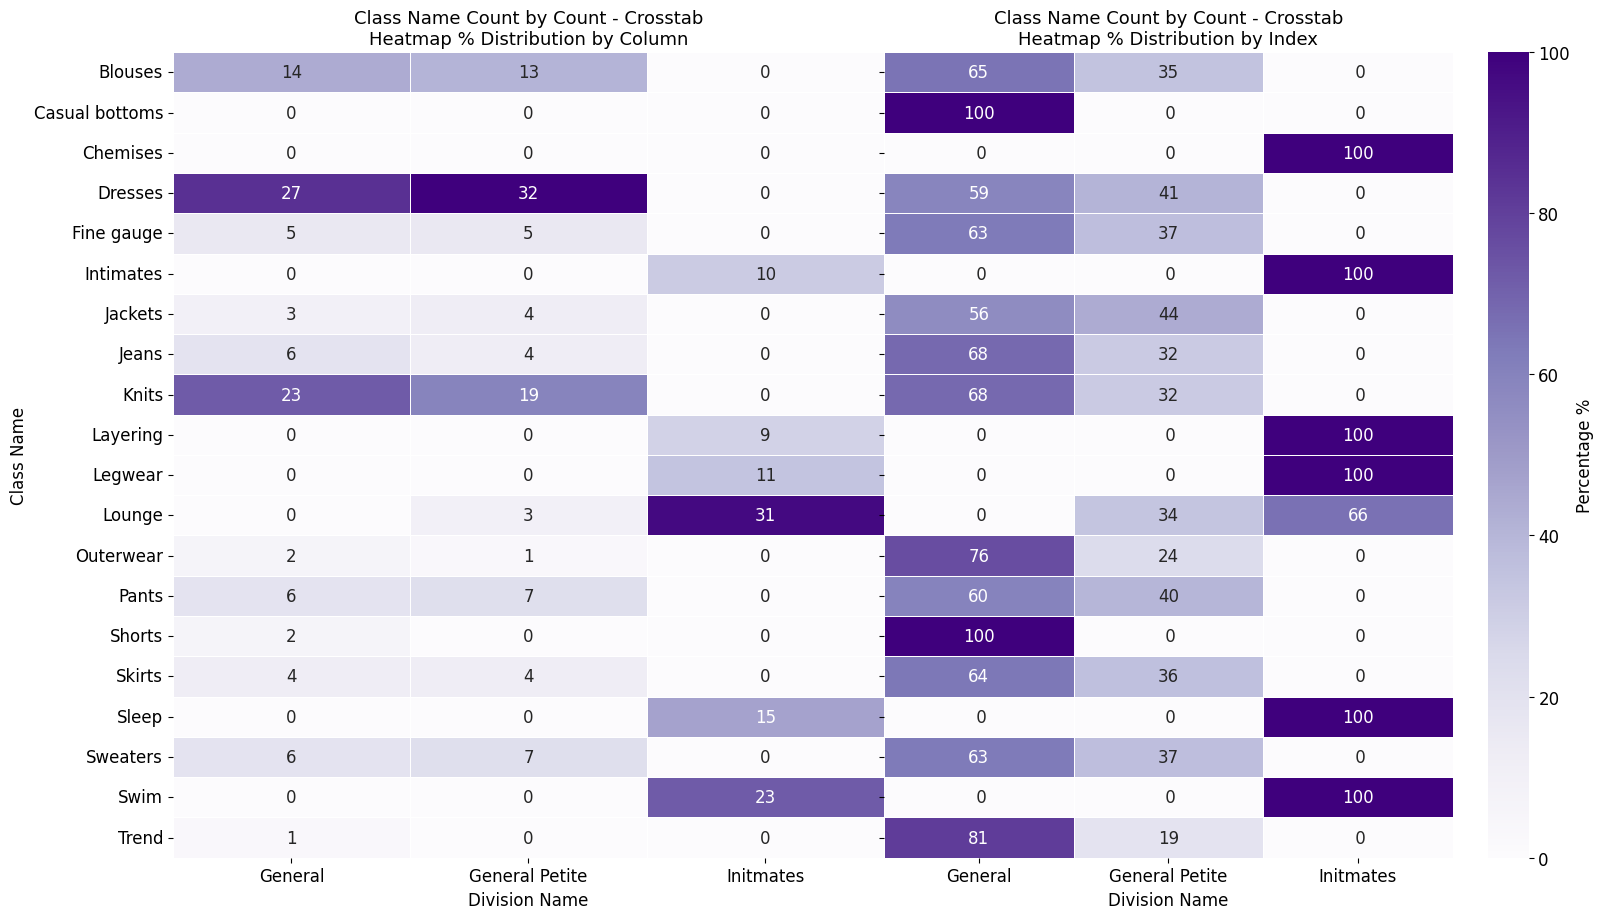

In [23]:
f, ax = plt.subplots(1, 2, figsize=(16, 9), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df['Division Name']),
            annot=True, linewidths=.5, ax=ax[0], fmt='g', cmap='Oranges',
            cbar_kws={'label': 'Count'})
ax[0].set_title('Class Name Count by Division Name - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(df['Class Name'], df['Division Name'], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1], fmt='g', cmap='Oranges',
            cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Division Name - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.savefig('classname-divname.png', format='png', dpi=300)
plt.show()

# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1, 2, figsize=(16, 9), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df['Division Name'], normalize = 'columns').mul(100).round(0),
            annot=True, fmt='g', linewidths=.5, ax=ax[0],cbar=False,cmap='Purples')
ax[0].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Column', fontsize = fsize)
ax[1] = sns.heatmap(pd.crosstab(df['Class Name'], df['Division Name'], normalize = 'index').mul(100).round(0),
                    annot=True, fmt='2g', linewidths=.5, ax=ax[1], cmap='Purples',
                    cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Index', fontsize=fsize)
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.savefig('classname-divname-pivot.png', format='png', dpi=300)

## Continuous Variable by Continuous Variable

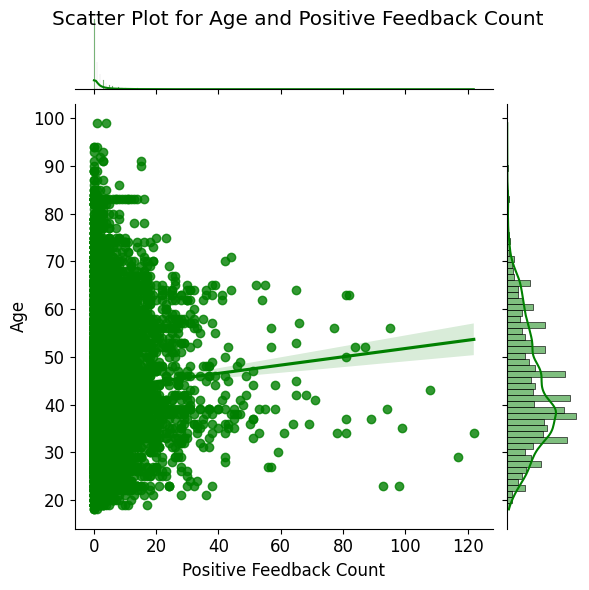

In [24]:
def minmaxscaler(df):
    return (df - df.min()) / (df.max() - df.min())

def zscorenomalize(df):
    return (df - df.mean()) / df.std()

g = sns.jointplot(x=df['Positive Feedback Count'], y=df['Age'], kind='reg', color='g')
g.fig.suptitle("Scatter Plot for Age and Positive Feedback Count")
plt.savefig('positivefeedback-age.png', format='png', dpi=300)
plt.show()

<Axes: >

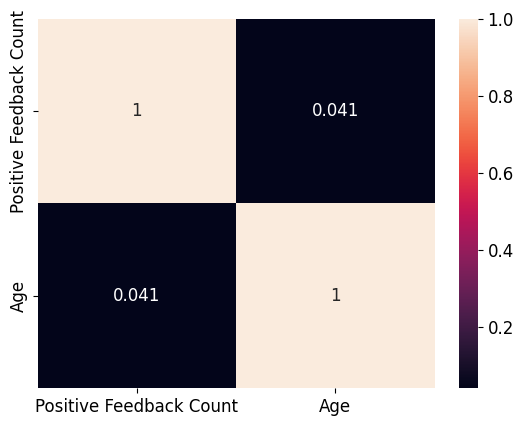

In [25]:
sns.heatmap(df[['Positive Feedback Count', 'Age']].corr(), annot=True)

## Percentage Standardize Distribution Plots

In [26]:
def percentstandardize_barplot(x, y, hue, data, ax=None, order=None):
    """
    Standardize by percentage the data using pandas functions, then plot using Seaborn.
    Function arguments are and extention of Seaborns'.
    """
    sns.barplot(x=x, y=y, hue=hue, ax=ax, order=order,
    data=(data[[x, hue]]
          .reset_index(drop=True)
          .groupby([x])[hue]
          .value_counts(normalize=True)
          .rename('Percentage').mul(100)
          .reset_index()
          .sort_values(hue)))
    plt.title('Percentage Frequency of {} by {}'.format(hue, x))
    plt.ylabel('Percentage %')

## Recommended IND by Department and Division

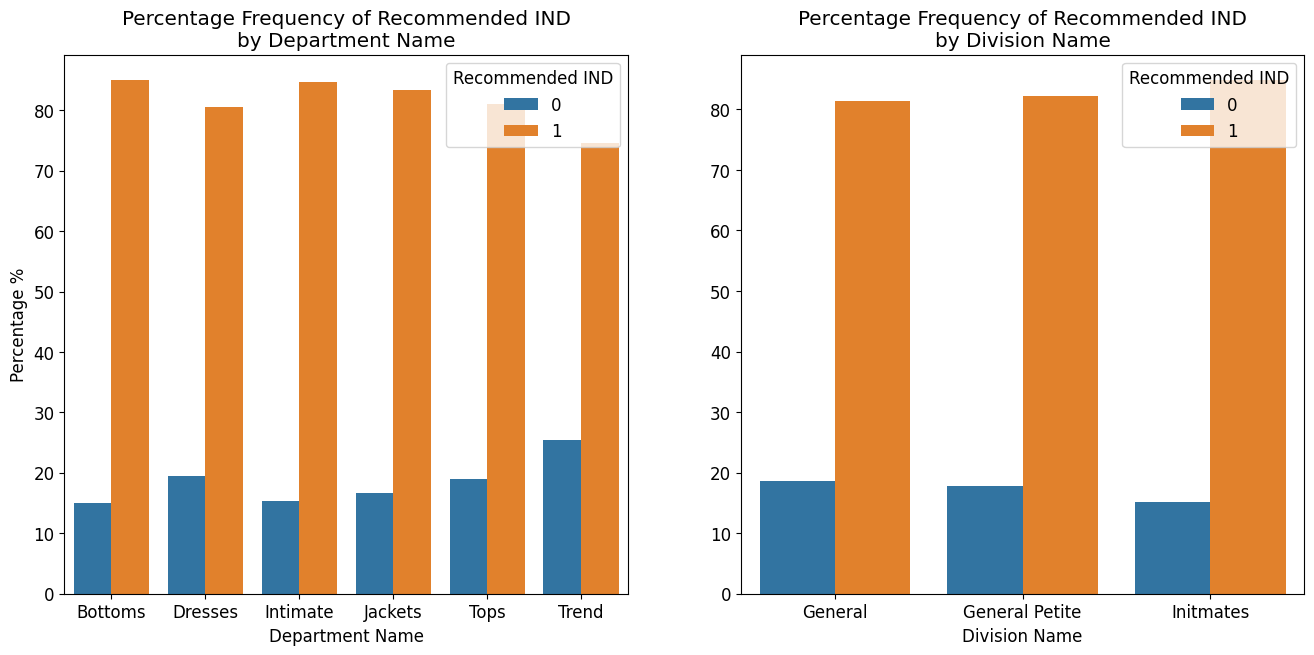

In [27]:
huevar = 'Recommended IND'
f, axes = plt.subplots(1, 2, figsize=(16, 7))
percentstandardize_barplot(x='Department Name', y='Percentage', hue=huevar,data=df, ax=axes[0])
axes[0].set_title('Percentage Frequency of {}\nby Department Name'.format(huevar))
axes[0].set_ylabel('Percentage %')
percentstandardize_barplot(x='Division Name', y='Percentage', hue=huevar, data=df, ax=axes[1])
axes[1].set_title('Percentage Frequency of {}\nby Division Name'.format(huevar))
axes[1].set_ylabel('')
plt.savefig('recommended-deptname-divname.png', format='png', dpi=300)
plt.show()

## Rating by Department and Division Name

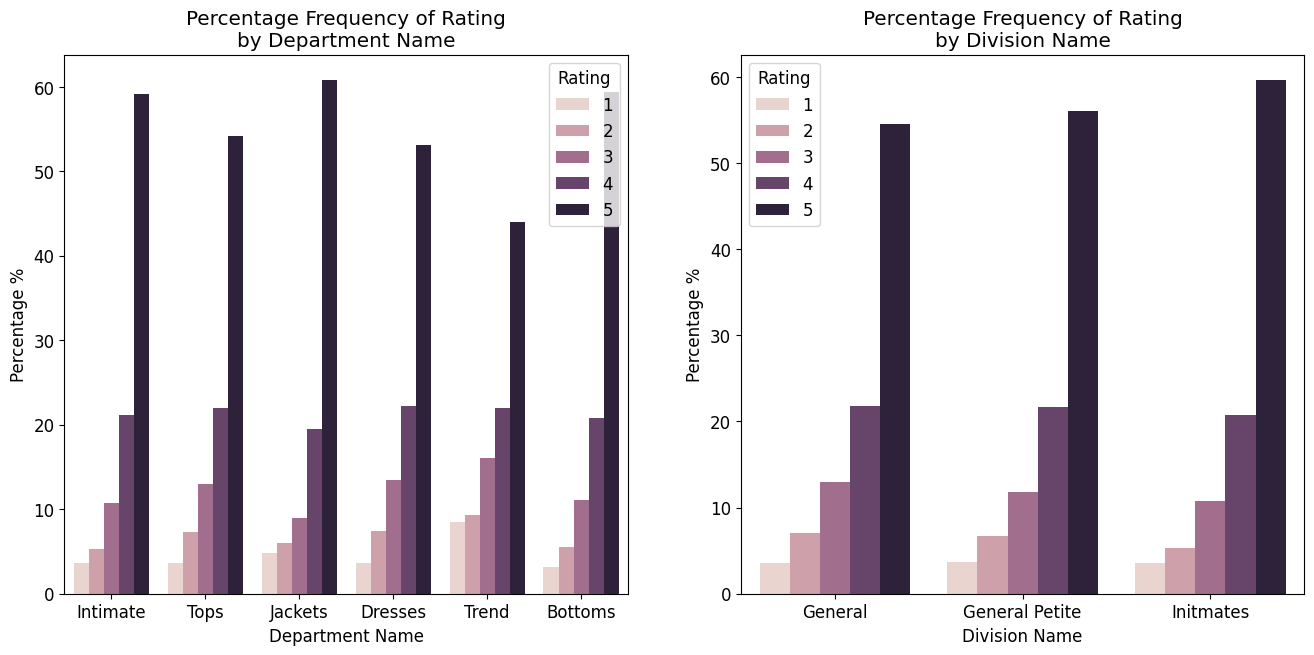

In [28]:
xvar = ['Department Name', 'Division Name']
huevar = 'Rating'
f, axes = plt.subplots(1, 2, figsize=(16, 7))
percentstandardize_barplot(x=xvar[0], y='Percentage', hue=huevar, data=df, ax=axes[0])
axes[0].set_title('Percentage Frequency of {}\nby {}'.format(huevar, xvar[0]))
axes[0].set_ylabel('Percentage %')
percentstandardize_barplot(x=xvar[1], y='Percentage', hue=huevar, data=df, ax=axes[1])
axes[1].set_title("Percentage Frequency of {}\nby {}".format(huevar, xvar[1]))
plt.savefig('rating-deptname-divname.png', format='png', dpi=300)
plt.show()

## Rating by Recommended IND

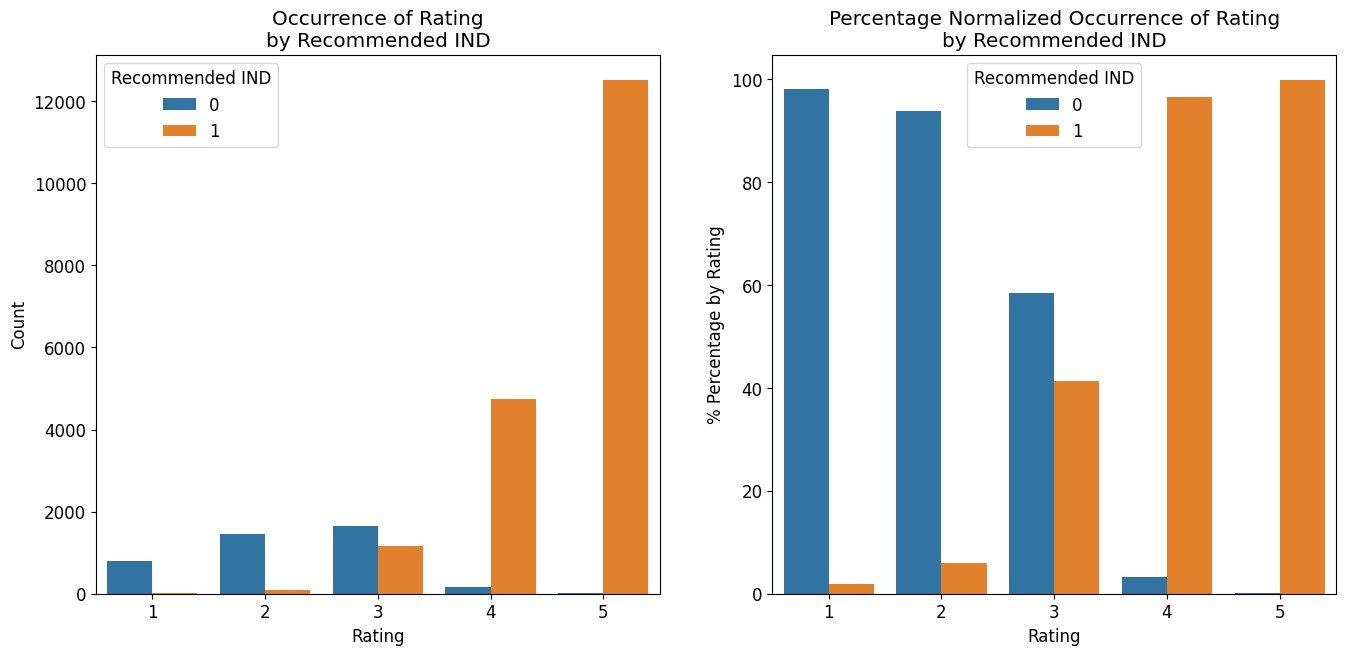

In [29]:
huevar = 'Rating'
f, axes = plt.subplots(1, 2, figsize=(16, 7))
sns.countplot(x='Rating', hue='Recommended IND', data=df, ax=axes[0])
axes[0].set_title('Occurrence of {}\nby {}'.format(huevar, 'Recommended IND'))
axes[0].set_ylabel('Count')
percentstandardize_barplot(x='Rating', y='Percentage', hue='Recommended IND', data=df, ax=axes[1])
axes[1].set_title('Percentage Normalized Occurrence of {}\nby {}'.format(huevar, 'Recommended IND'))
axes[1].set_ylabel('% Percentage by Rating')
plt.savefig('rating-recommended.png', format='png', dpi=300)
plt.show()

# Multivariate Analysis and Descriptive Statistics
## Rating by Recommended IND

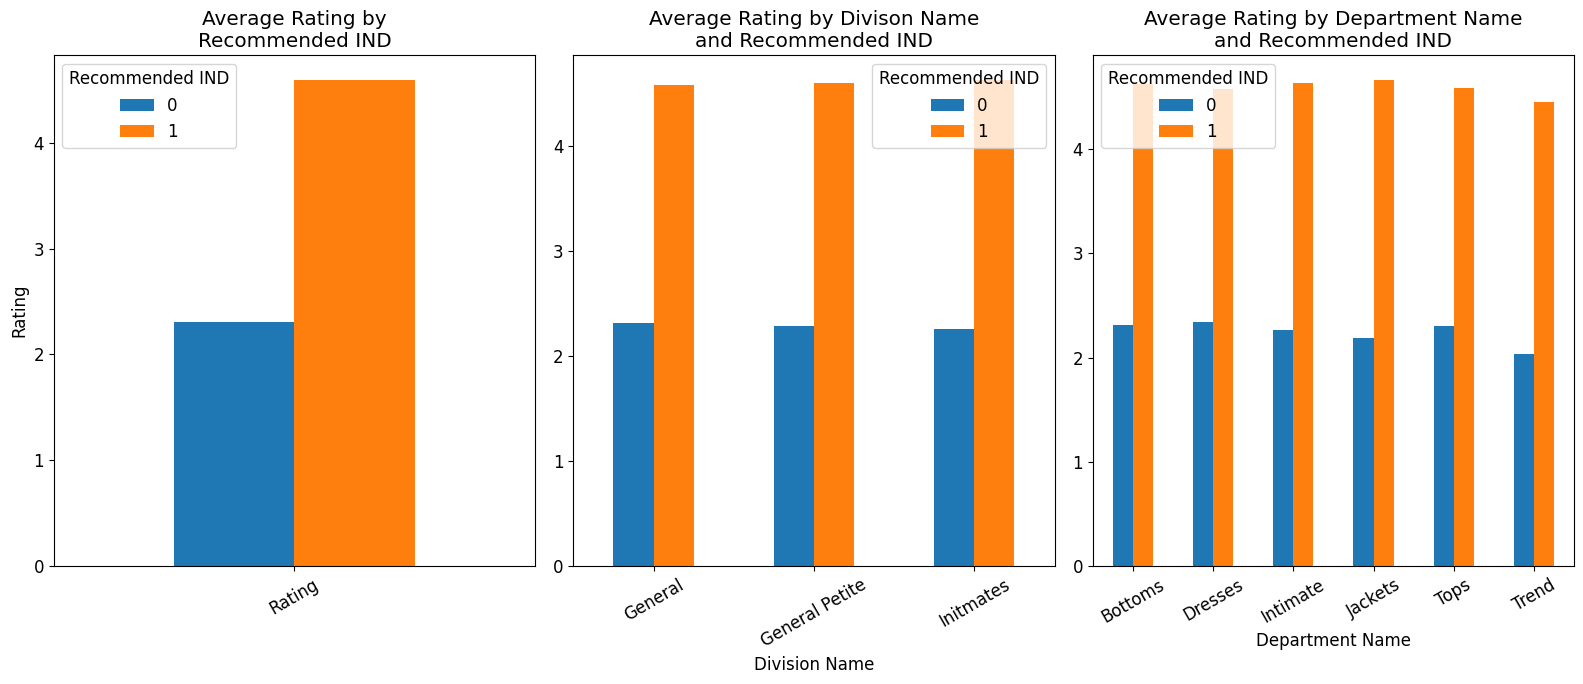

In [30]:
f, axes = plt.subplots(1, 3, figsize=(16, 7))
rot = 30
df.pivot_table('Rating',
               columns=['Recommended IND']).plot.bar(ax=axes[0], rot=rot)
axes[0].set_title('Average Rating by\nRecommended IND')
df.pivot_table('Rating', index='Division Name',
               columns=['Recommended IND']).plot.bar(ax=axes[1], rot=rot)
axes[1].set_title('Average Rating by Divison Name\nand Recommended IND')
df.pivot_table('Rating', index='Department Name',
               columns=['Recommended IND']).plot.bar(ax=axes[2], rot=rot)
axes[0].set_ylabel('Rating')
axes[2].set_title('Average Rating by Department Name\nand Recommended IND')
f.tight_layout()
plt.savefig('meanrating-deptname-recommended.png', format='png', dpi=300)
plt.show()

## Average Rating and Recommended IND by Clothing ID Correlation

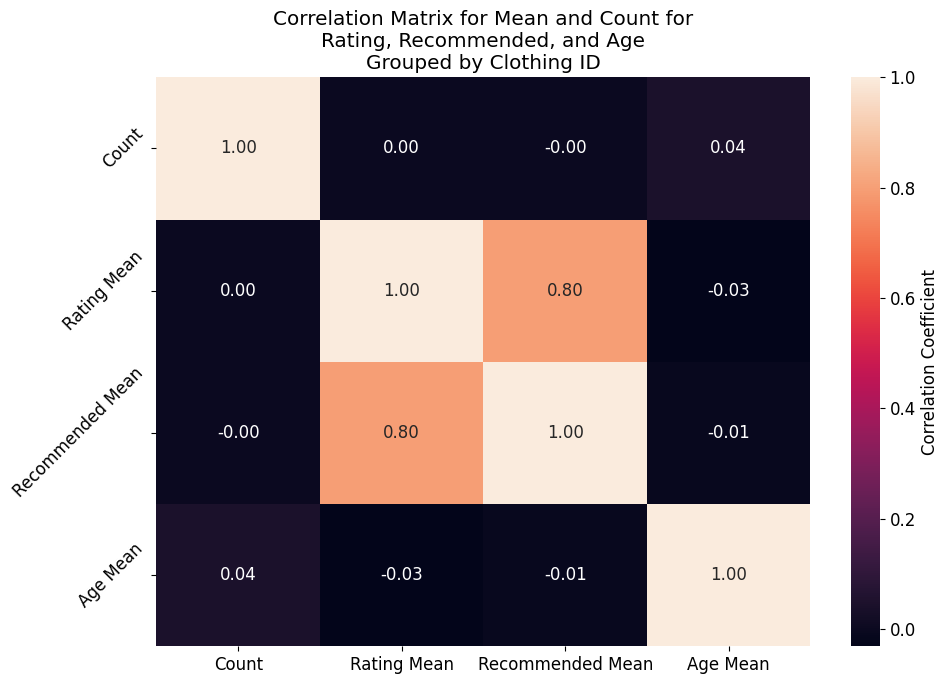

In [31]:
temp = (df.groupby('Clothing ID')[['Rating', 'Recommended IND', 'Age']]
        .aggregate(['count', 'mean']))
temp.columns = ['Count', 'Rating Mean', 'Recommended IND Count',
                'Recommended Mean', 'Age Count', 'Age Mean']
temp.drop(['Recommended IND Count', 'Age Count'], axis=1, inplace=True)

# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[10, 7])
ax = sns.heatmap(temp.corr(),
                 annot=True, fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title('Correlation Matrix for Mean and Count for\nRating, Recommended, and Age\nGrouped by Clothing ID')
plt.yticks(rotation=45)
plt.tight_layout()
plt.savefig('meanrating-recommended-clothing-corr.png', format='png', dpi=300)
plt.show()

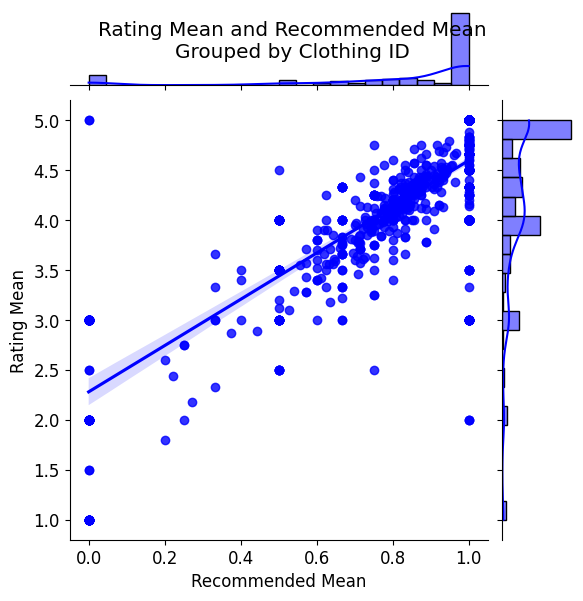

In [32]:
g = sns.jointplot(x='Recommended Mean', y='Rating Mean', data=temp,
                  kind='reg', color='b')
plt.subplots_adjust(top=0.999)
g.fig.suptitle('Rating Mean and Recommended Mean\nGrouped by Clothing ID')
plt.savefig('meanrating-recommended-clothing.png', format='png', dpi=300)
plt.show()

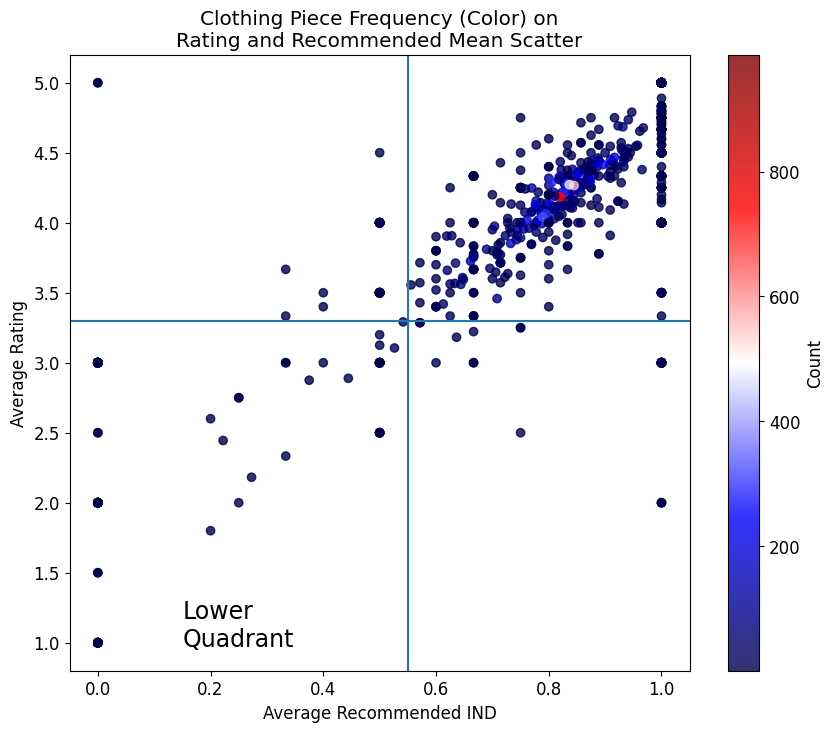

,Count,Rating Mean,Recommended Mean,Age Mean
count,204.000000,204.000000,204.000000,204.000000
mean,2.308824,2.763338,0.316315,41.883954
std,2.798261,0.819220,0.351723,10.858979
min,1.000000,1.000000,0.000000,20.000000
25%,1.000000,2.136364,0.000000,34.687500
50%,1.000000,3.000000,0.250000,41.142857
75%,2.000000,3.000000,0.500000,47.000000
max,24.000000,5.000000,1.000000,74.000000


In [33]:
plt.figure(figsize=(10, 8))
plt.scatter(temp['Recommended Mean'], temp['Rating Mean'],
            alpha=.8, c=temp["Count"], cmap='seismic')
cbar = plt.colorbar() # Color bar. Vive la France!
cbar.set_label('Count', rotation=90)
plt.xlabel('Average Recommended IND')
plt.ylabel('Average Rating')
plt.title('Clothing Piece Frequency (Color) on\nRating and Recommended Mean Scatter')

# Vertical and Horizontal Lines
l = plt.axhline(y=3.3)
l = plt.axvline(x=.55)

# Text
plt.text(.15, 1, 'Lower\nQuadrant', ha='left', wrap=True, fontsize=17)
plt.savefig('low-quadrant.png', format='png', dpi=300)
plt.show()

# Descriptives for LOW QUADRANT
temp[(temp['Rating Mean'] < 3.3) | (temp['Recommended Mean'] <= .55)].describe()


## Average Rating and Recommended IND by Class Name Correlation

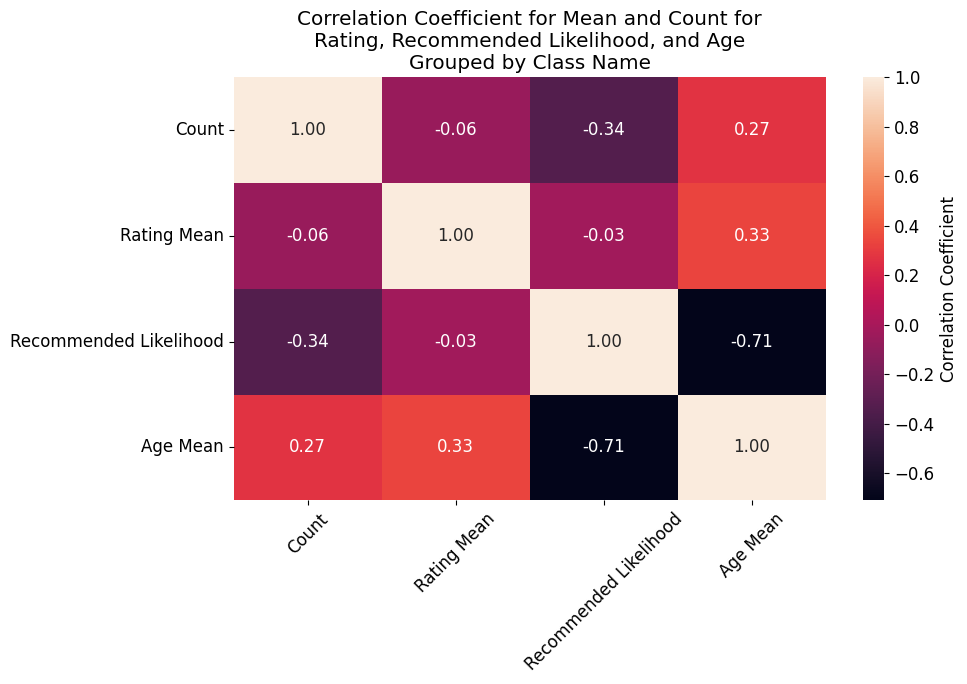

Class Categories:
 ['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Casual bottoms' 'Chemises']


In [34]:
key = 'Class Name'
temp = (df.groupby(key)[['Rating', 'Recommended IND', 'Age']]
        .aggregate(['count', 'mean']))
temp.columns = ['Count', 'Rating Mean', 'Recommended Likelihood Count',
                'Recommended Likelihood', 'Age Count', 'Age Mean']
temp.drop(['Recommended Likelihood Count', 'Age Count'], axis=1, inplace=True)

# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[10, 7])
ax = sns.heatmap(temp.corr(),
                 annot=True, fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
ax.set_title('Correlation Coefficient for Mean and Count for\nRating, Recommended Likelihood, and Age\nGrouped by {}'.format(key))
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('meanrating-recommended-classname-corr.png', format='png', dpi=300)
plt.show()
print('Class Categories:\n',df['Class Name'].unique())

(0.7, 1.01)

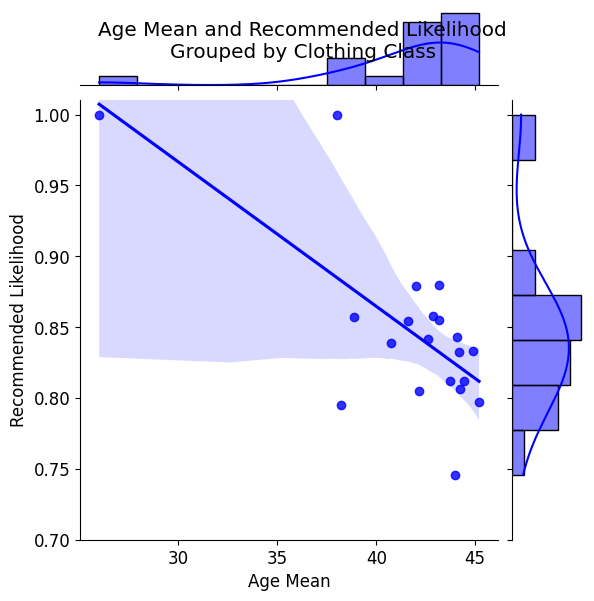

In [35]:
g = sns.jointplot(y='Recommended Likelihood', x='Age Mean', data=temp,
                  kind='reg', color='b')
plt.subplots_adjust(top=0.999)
g.fig.suptitle('Age Mean and Recommended Likelihood\nGrouped by Clothing Class')
plt.savefig('meanage-recommended-clothing.png', format='png', dpi=300)
plt.ylim(.7, 1.01)

# Working with Text

In [37]:
pd.set_option('max_colwidth', 500)
df[["Title","Review Text", "Rating"]].sample(7)

,Title,Review Text,Rating
19600,Perfect fit and color,"These shorts are comfortable but so stylish. even though, i love many of retailer shorts, these are one of my favorites.",4
2183,NaN,"Got this shirt on sale and i hope they restock so i can buy more. super comfy and flattering at the same time. i have some extra baby weight and it camouflages that well. i'm normally a 6-8 but i'm an 8-10 right now and the medium was perfect. i'm 5'6"" and its plenty long enough to wear with leggings. a great shirt and i'll be sure to watch out for this one to come back. please restock!",5
19492,Wish i liked it,"I wanted to like this but it just didn't have much of a shape, not flattering at all. maybe if i was taller?",2
3008,NaN,"I just bought this dress in the store and i absolutely love it except for one thing. why are the sleeves on the actual dress so much shorter than the picture with the model? i suspect the model has long arms, not little t-rex arms, so why does the sleeve hit at the top of her wrist, while my lovely dress hits just past my elbow. it's a mystery. was the pictured item not what the store took delivery of? anyway, still a great dress, just trying to figure out if i should add lace or something t...",4
1623,Runs small,"Bought these in 2p and i'm normally 0p in most pants. for reference, i'm 5'1 and 107 lbs and the 2 fit perfect! got many compliments on these pants",5
3061,Great top!,"I was hesitant to try this top on because i thought it might be too tight, and then was delighted to find that it is so comfortable and flattering. i am usually a m and the m fit me great. i have to disagree with another reviewer that this top is for those of us b cup or smaller. i am a d and it fit me great. it's got enough give and support (great fabric and wrap design) to fit a wide range of bust lines. it's a great blend of being attractive without being too revealing. i love it. got it ...",5
15319,Great lounge wear,Excellent dress for lounging in the house or for sleeping. very comfortable and a little sexy at the same time.,5


In [69]:
df.head(5)['Review Text']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Absolutely wonderful - silky and sexy and comfortable
1                                                                                                                                                                                                        Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is trul

## Text Cleaning

In [70]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #words = [ps.stem(w) for w in words] #4
    return words

In [80]:
example = df['Review Text'][5]
print(example)

I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.


In [90]:
#tokens= nltk.word_tokenize(example)
#preprocessing(example)
preprocessing(df['Review Text'][:10])

['absolutely', 'wonderful', 'silky', 'sexy', 'comfortable', 'love', 'dress', 'sooo', 'pretty', 'happened', 'find', 'store', 'glad', 'bc', 'never', 'would', 'ordered', 'online', 'bc', 'petite', 'bought', 'petite', '5', '8', 'love', 'length', 'hits', 'little', 'knee', 'would', 'definitely', 'true', 'midi', 'someone', 'truly', 'petite', 'high', 'hopes', 'dress', 'really', 'wanted', 'work', 'initially', 'ordered', 'petite', 'small', 'usual', 'size', 'found', 'outrageously', 'small', 'small', 'fact', 'could', 'zip', 'reordered', 'petite', 'medium', 'ok', 'overall', 'top', 'half', 'comfortable', 'fit', 'nicely', 'bottom', 'half', 'tight', 'layer', 'several', 'somewhat', 'cheap', 'net', 'layers', 'imo', 'major', 'design', 'flaw', 'net', 'layer', 'sewn', 'directly', 'zipper', 'c', 'love', 'love', 'love', 'jumpsuit', 'fun', 'flirty', 'fabulous', 'every', 'time', 'wear', 'get', 'nothing', 'great', 'compliments', 'shirt', 'flattering', 'due', 'adjustable', 'front', 'tie', 'perfect', 'length', 'we

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 '5',
 '8',
 'love',
 'length',
 'hits',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hopes',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layers',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'c

## Sentiment Analysis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Pre-Processing
SIA = SentimentIntensityAnalyzer()
df['Review Text']= df['Review Text'].astype(str)

# Applying Model, Variable Creation
df['Polarity Score'] = df['Review Text'].apply(lambda x: SIA.polarity_scores(x)['compound'])
df['Neutral Score'] = df['Review Text'].apply(lambda x: SIA.polarity_scores(x)['neu'])
df['Negative Score'] = df['Review Text'].apply(lambda x: SIA.polarity_scores(x)['neg'])
df['Positive Score'] = df['Review Text'].apply(lambda x: SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Sentiment'] = ''
df.loc[df['Polarity Score'] > 0, 'Sentiment'] = 'Positive'
df.loc[df['Polarity Score'] == 0, 'Sentiment'] = 'Neutral'
df.loc[df['Polarity Score'] < 0, 'Sentiment'] = 'Negative'

## Counting no of rows with sentiments

In [ ]:
pos_senti=df[df['Sentiment'] == 'Positive'].shape[0]
neg_senti=df[df['Sentiment'] == 'Negative'].shape[0]
neu_senti=df[df['Sentiment'] == 'Neutral'].shape[0]
print("positive_sentiment:",pos_senti)
print("negative_sentiment:",neg_senti)
print("neutral_sentiment:",neu_senti)

## Negative Sentiments Example

In [ ]:
df[df['Sentiment'] == 'Negative'].sample(5)

## Recommended Dataframe and Not Recommended Dataframe

In [ ]:
df_recommended=df[(df['Sentiment']== 'Positive') | (df['Sentiment']=='Neutral')]
df_not_recommended=df[df['Sentiment']=='Negative']

In [ ]:
print("Rows of original dataframe", len(df))
print("Rows of recommended dataframe",len(df_recommended))
print("Rows of not recommended dataframe",len(df_not_recommended))

In [ ]:
from sklearn.cluster import KMeans
df = pd.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [6, 7, 8, 9, 10]})
condition = df['A'] > 3
df_filtered = df[condition]
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_filtered[['A', 'B']])
cluster_labels = kmeans.predict(df_filtered[['A', 'B']])
df_filtered['cluster'] = cluster_labels



### Bottoms DataFrame

In [ ]:
df_bottoms=df_recommended[df_recommended['Department Name']=='Bottoms']
#df_bottoms.sample(5)

### Dresses DataFrame

In [ ]:
df_dresses=df_recommended[df_recommended['Department Name']=='Dresses']
#df_dresses.sample(5)

### Intimates DataFrame

In [ ]:
df_intimates=df_recommended[df_recommended['Department Name']=='Intimate']
#df_intimates.sample(5)

### Jackets DatFrame DataFrame

In [ ]:
df_jackets=df_recommended[df_recommended['Department Name']=='Jackets']
#df_jackets.sample(5)

### Tops DataFrame

In [ ]:
df_tops=df_recommended[df_recommended['Department Name']=='Tops']
#df_tops.sample(5)

### Trends DataFrame

In [ ]:
df_trends=df_recommended[df_recommended['Department Name']=='Trend']
#df_trends.sample(5)

In [ ]:
#df_not_dresses=df_not_recommended[df_not_recommended['Department Name']=='Dresses']

In [ ]:
print("Rows of bottoms dataframe", len(df_bottoms))
print("Rows of dresses dataframe", len(df_dresses))
print("Rows of intimates dataframe", len(df_intimates))
print("Rows of jackets dataframe", len(df_jackets))
print("Rows of tops dataframe", len(df_tops))
print("Rows of trends dataframe", len(df_trends))

### Skirts DataFrame of Bottoms DataFrame


In [ ]:
df_skirts=df_bottoms[df_bottoms['Class Name']=='Skirts']

### Shorts DataFrame of Bottoms DataFrame

In [ ]:
df_shorts=df_bottoms[df_bottoms['Class Name']=='Shorts']

### Pants DataFrame of Bottoms DataFrame

In [ ]:
df_pants=df_bottoms[df_bottoms['Class Name']=='Pants']

### Jeans DataFrame of Bottoms DataFrame

In [ ]:
df_jeans=df_bottoms[df_bottoms['Class Name']=='Jeans']

### Swim DataFrame of Intimates DataFrame

In [ ]:
df_swim=df_intimates[df_intimates['Class Name']=='Swim']

### Sleep DataFrame of Intimates DataFrame

In [ ]:
df_sleep=df_intimates[df_intimates['Class Name']=='Sleep']

### Lounge DataFrame of Intimates DataFrame

In [ ]:
df_lounge=df_intimates[df_intimates['Class Name']=='Lounge']

### Legwear DataFrame of Intimates DataFrame

In [ ]:
df_legwear=df_intimates[df_intimates['Class Name']=='Legwear']

### Layering DataFrame of Intimates DataFrame

In [ ]:
df_layering=df_intimates[df_intimates['Class Name']=='Layering']

### Outerwear DataFrame of Jackets DataFrame

In [ ]:
df_outerwear=df_jackets[df_jackets['Class Name']=='Outerwear']

### Jacket DataFrame of Jackets DataFrame

In [ ]:
df_jacket=df_jackets[df_jackets['Class Name']=='Jackets']

### Sweaters DataFrame of Tops DataFrame

In [ ]:
df_sweaters=df_tops[df_tops['Class Name']=='Sweaters']

### Knits DataFrame of Tops DataFrame

In [ ]:
df_knits=df_tops[df_tops['Class Name']=='Knits']

### Fine Gauge DataFrame of Tops DataFrame

In [ ]:
df_gauge=df_tops[df_tops['Class Name']=='Fine gauge']

## Blouses DataFrame of Tops DataFrame

In [ ]:
df_blouses=df_tops[df_tops['Class Name']=='Blouses']
